In [12]:
!pip install statsmodels

In [13]:
import os
import pandas as pd
import matplotlib .pyplot as plt
import numpy as np

In [14]:
cte_data = pd.read_csv("Clean_and_Combine.csv")
cte_data.head()

,DISTRICT,SERVICE,SERVICEX,CTE_STUDENTS_2015,CTE_HOURS_2015,CTE_AVG_2015,ALL_STUDENTS_2015,ALL_HOURS_2015,ALL_AVG_2015,CTE_STUDENTS_2016,...,ALL_AVG_2017,CTE_STUDENTS_2018,CTE_HOURS_2018,CTE_AVG_2018,ALL_STUDENTS_2018,ALL_HOURS_2018,ALL_AVG_2018,District,TEA District Type,TEA Description
0,1902,3101100,PRECALCULUS (PRE CALC),9.0,36.0,4.0,18.0,54.0,3.0,9.0,...,5.8,15.0,45.0,3.0,15.0,45.0,3.0,CAYUGA ISD,H,Rural
1,1902,3220300,ENGLISH III (ENG 3),12.0,48.0,4.0,12.0,48.0,4.0,18.0,...,5.8,15.0,90.0,6.0,17.0,102.0,6.0,CAYUGA ISD,H,Rural
2,1902,3220400,ENGLISH IV (ENG 4),10.0,57.0,5.7,14.0,81.0,5.8,7.0,...,5.6,15.0,81.0,5.4,15.0,81.0,5.4,CAYUGA ISD,H,Rural
3,1902,3310300,ECONOMICS W/EMPH FREE ENTERPR,3.0,3.0,3.0,3.0,3.0,3.0,10.0,...,3.0,6.0,18.0,3.0,6.0,18.0,3.0,CAYUGA ISD,H,Rural
4,1902,3330100,UNITED STATES GOVERNMENT (GOVT,3.0,3.0,3.0,3.0,3.0,3.0,12.0,...,3.0,6.0,18.0,3.0,6.0,18.0,3.0,CAYUGA ISD,H,Rural


In [15]:
bins = [0, 2999999, 3200000, 3300000, 4000000, 2000000000]
group_labels = ["Misc","STEM","English","Social Sciences","CTE/Tech"]

In [16]:
cte_data["Course Type"] = pd.cut(cte_data["SERVICE"], bins, labels=group_labels)
cte_data.head()

,DISTRICT,SERVICE,SERVICEX,CTE_STUDENTS_2015,CTE_HOURS_2015,CTE_AVG_2015,ALL_STUDENTS_2015,ALL_HOURS_2015,ALL_AVG_2015,CTE_STUDENTS_2016,...,CTE_STUDENTS_2018,CTE_HOURS_2018,CTE_AVG_2018,ALL_STUDENTS_2018,ALL_HOURS_2018,ALL_AVG_2018,District,TEA District Type,TEA Description,Course Type
0,1902,3101100,PRECALCULUS (PRE CALC),9.0,36.0,4.0,18.0,54.0,3.0,9.0,...,15.0,45.0,3.0,15.0,45.0,3.0,CAYUGA ISD,H,Rural,STEM
1,1902,3220300,ENGLISH III (ENG 3),12.0,48.0,4.0,12.0,48.0,4.0,18.0,...,15.0,90.0,6.0,17.0,102.0,6.0,CAYUGA ISD,H,Rural,English
2,1902,3220400,ENGLISH IV (ENG 4),10.0,57.0,5.7,14.0,81.0,5.8,7.0,...,15.0,81.0,5.4,15.0,81.0,5.4,CAYUGA ISD,H,Rural,English
3,1902,3310300,ECONOMICS W/EMPH FREE ENTERPR,3.0,3.0,3.0,3.0,3.0,3.0,10.0,...,6.0,18.0,3.0,6.0,18.0,3.0,CAYUGA ISD,H,Rural,Social Sciences
4,1902,3330100,UNITED STATES GOVERNMENT (GOVT,3.0,3.0,3.0,3.0,3.0,3.0,12.0,...,6.0,18.0,3.0,6.0,18.0,3.0,CAYUGA ISD,H,Rural,Social Sciences


In [17]:
district_types = cte_data["TEA Description"].value_counts()
district_types

Rural                            4908
Other Central City Suburban      3749
Non-metropolitan Stable          2937
Major Suburban                   2446
Other Central City               1754
Independent Town                 1350
Charter School Districts         1085
Major Urban                      1044
Non-metropolitan Fast Growing     569
Name: TEA Description, dtype: int64

In [18]:
cte_focus = cte_data[cte_data['Course Type'] == "CTE/Tech"]
cte_focus.head()

,DISTRICT,SERVICE,SERVICEX,CTE_STUDENTS_2015,CTE_HOURS_2015,CTE_AVG_2015,ALL_STUDENTS_2015,ALL_HOURS_2015,ALL_AVG_2015,CTE_STUDENTS_2016,...,CTE_STUDENTS_2018,CTE_HOURS_2018,CTE_AVG_2018,ALL_STUDENTS_2018,ALL_HOURS_2018,ALL_AVG_2018,District,TEA District Type,TEA Description,Course Type
6,1902,13009900,PROFESSIONAL COMMUNICATIONS,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,CAYUGA ISD,H,Rural,CTE/Tech
14,1904,13014300,HUMAN GROWTH & DEVELOP,14.0,42.0,3.0,14.0,42.0,3.0,26.0,...,11.0,33.0,3.0,11.0,33.0,3.0,FRANKSTON ISD,H,Rural,CTE/Tech
15,1904,13020400,HEALTH SCIENCE,7.0,14.0,2.0,7.0,14.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,FRANKSTON ISD,H,Rural,CTE/Tech
30,1906,13008400,ADVANCED ANIMATION,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NECHES ISD,H,Rural,CTE/Tech
31,1906,13012100,BUSINESS MANAGEMENT,6.0,6.0,6.0,6.0,6.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NECHES ISD,H,Rural,CTE/Tech


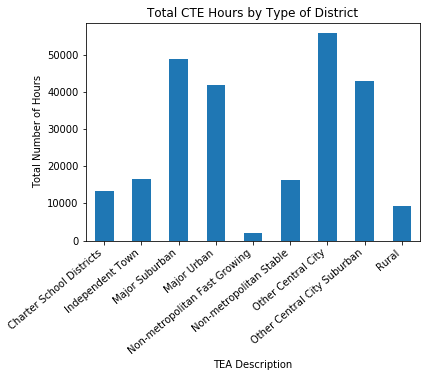

In [19]:
tea_groups = cte_focus.groupby('TEA Description')

total_hours = tea_groups['CTE_HOURS_2018'].sum()
tea_chart = total_hours.plot(kind="bar", title="Total CTE Hours by Type of District")
tea_chart.set_xlabel("TEA Description")
tea_chart.set_ylabel("Total Number of Hours")
plt.xticks(rotation=40, ha="right")

plt.savefig("Images/DistrictData")
plt.show()

In [20]:
group={}
import scipy.stats as stats
counter=0
district_type=["Rural", "Other Central City Suburban", "Non-metropolitan Stable", "Major Suburban", "Other Central City",
               "Independent Town","Charter School Districts", "Major Urban", "Non-metropolitan Fast Growing"]
for x in district_type:

    group[counter] = cte_data[cte_data["TEA Description"]==x]["CTE_AVG_2015"]
    
    counter=counter+1
    

stats.f_oneway(group[0], group[1], group[2], group[3], group[4], group[5], group[6], group[7], group[8])

F_onewayResult(statistic=22.277423660740254, pvalue=3.531228621032839e-34)

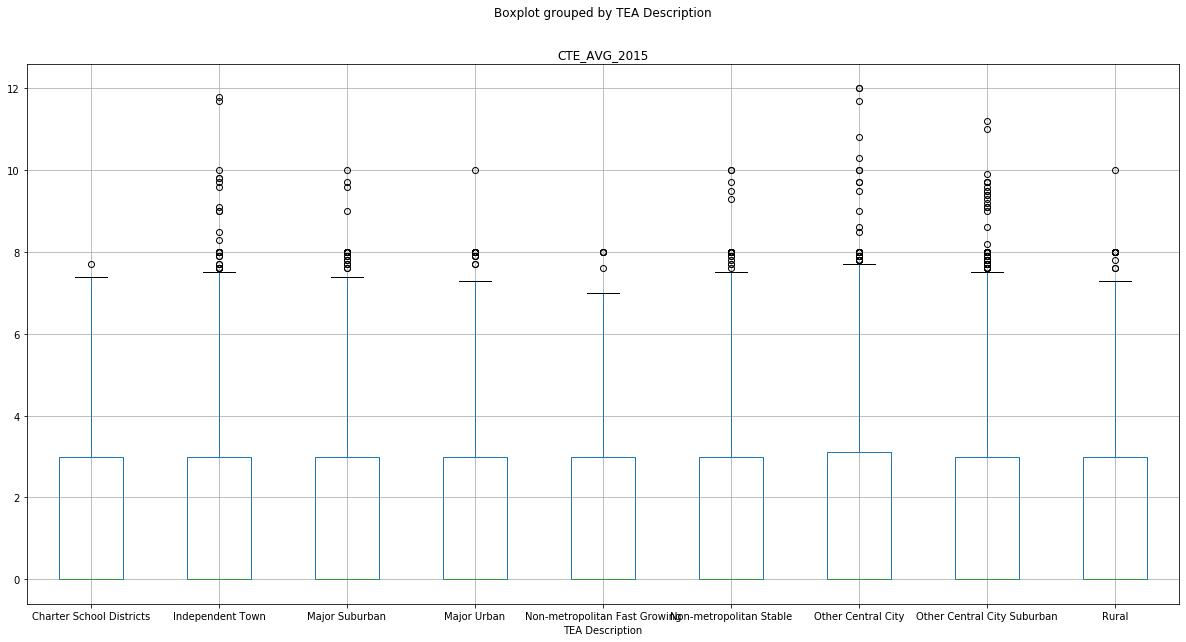

In [28]:
cte_data.boxplot("CTE_AVG_2015", by ="TEA Description", figsize=(20, 10))
plt.savefig("Images/BoxPlot")
plt.show()


In [29]:
%matplotlib inline
from statsmodels.stats.multicomp import pairwise_tukeyhsd

endog=cte_data["CTE_AVG_2015"]
groups=cte_data["TEA Description"]

turkey=pairwise_tukeyhsd(endog, groups)
print(turkey)

                       Multiple Comparison of Means - Tukey HSD, FWER=0.05                        
            group1                        group2            meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------------------------
     Charter School Districts              Independent Town   0.7701  0.001  0.5035  1.0367   True
     Charter School Districts                Major Suburban   0.6726  0.001  0.4341  0.9111   True
     Charter School Districts                   Major Urban   0.5739  0.001  0.2904  0.8574   True
     Charter School Districts Non-metropolitan Fast Growing   0.4605  0.001   0.122   0.799   True
     Charter School Districts       Non-metropolitan Stable   0.6688  0.001  0.4365  0.9011   True
     Charter School Districts            Other Central City   0.9261  0.001  0.6735  1.1786   True
     Charter School Districts   Other Central City Suburban   0.7557  0.001  0.5303  0.9812   True
     Chart